In [2]:
## imported libraries
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [3]:
## dataset https://www.kaggle.com/datasets/farazrahman/earthquake?taskId=6195
## desc https://earthquake.usgs.gov/data/comcat/index.php#magError
## read data 
earthquake_data = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")
earthquake_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-19T08:54:46.250Z,34.040667,-116.932000,14.320,0.76,ml,23.0,84.00,0.052850,0.1900,...,2023-05-19T08:58:16.188Z,"10km E of Yucaipa, CA",earthquake,0.38,0.660,0.144000,17.0,automatic,ci,ci
1,2023-05-19T08:46:25.910Z,38.795834,-122.758835,4.210,0.43,md,7.0,150.00,0.004833,0.0200,...,2023-05-19T08:58:10.018Z,"2km N of The Geysers, CA",earthquake,0.91,1.910,0.200000,7.0,automatic,nc,nc
2,2023-05-19T08:44:01.280Z,34.342833,-117.532000,0.020,1.23,ml,17.0,146.00,0.138500,0.2600,...,2023-05-19T08:47:47.318Z,"10km ESE of Wrightwood, CA",earthquake,0.77,31.610,0.230000,28.0,automatic,ci,ci
3,2023-05-19T08:43:42.070Z,61.427600,-146.603500,20.100,1.10,ml,NaN,NaN,NaN,0.9500,...,2023-05-19T08:45:51.978Z,"35 km NNW of Valdez, Alaska",earthquake,NaN,0.600,NaN,NaN,automatic,ak,ak
4,2023-05-19T08:33:58.620Z,19.342667,-155.097000,2.600,2.36,ml,30.0,201.00,NaN,0.1900,...,2023-05-19T08:39:29.780Z,"14 km SSE of Fern Forest, Hawaii",earthquake,0.60,0.630,0.520000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,2023-04-19T09:11:05.420Z,19.396333,-155.269333,0.160,0.48,md,11.0,102.00,NaN,0.1100,...,2023-04-19T09:28:00.950Z,"6 km SW of Volcano, Hawaii",earthquake,0.25,0.160,0.126591,3.0,reviewed,hv,hv
11677,2023-04-19T09:09:02.766Z,60.173800,-153.022400,121.900,2.10,ml,NaN,NaN,NaN,0.5100,...,2023-04-24T18:13:20.063Z,Southern Alaska,earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
11678,2023-04-19T09:06:03.156Z,-5.946000,149.632800,40.000,6.30,mww,180.0,36.00,3.065000,0.9700,...,2023-05-17T16:51:42.908Z,"30 km NNE of Kandrian, Papua New Guinea",earthquake,7.98,1.939,0.043000,53.0,reviewed,us,us
11679,2023-04-19T09:04:39.904Z,19.314100,121.175400,42.351,4.50,mb,54.0,188.00,3.487000,0.7300,...,2023-05-03T04:50:14.040Z,"77 km N of Namuac, Philippines",earthquake,12.87,9.089,0.079000,47.0,reviewed,us,us


In [4]:
## first five rows 
earthquake_data.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-19T08:54:46.250Z,34.040667,-116.932000,14.32,0.76,ml,23.0,84.0,0.052850,0.19,...,2023-05-19T08:58:16.188Z,"10km E of Yucaipa, CA",earthquake,0.38,0.66,0.144,17.0,automatic,ci,ci
1,2023-05-19T08:46:25.910Z,38.795834,-122.758835,4.21,0.43,md,7.0,150.0,0.004833,0.02,...,2023-05-19T08:58:10.018Z,"2km N of The Geysers, CA",earthquake,0.91,1.91,0.200,7.0,automatic,nc,nc
2,2023-05-19T08:44:01.280Z,34.342833,-117.532000,0.02,1.23,ml,17.0,146.0,0.138500,0.26,...,2023-05-19T08:47:47.318Z,"10km ESE of Wrightwood, CA",earthquake,0.77,31.61,0.230,28.0,automatic,ci,ci
3,2023-05-19T08:43:42.070Z,61.427600,-146.603500,20.10,1.10,ml,NaN,NaN,NaN,0.95,...,2023-05-19T08:45:51.978Z,"35 km NNW of Valdez, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
4,2023-05-19T08:33:58.620Z,19.342667,-155.097000,2.60,2.36,ml,30.0,201.0,NaN,0.19,...,2023-05-19T08:39:29.780Z,"14 km SSE of Fern Forest, Hawaii",earthquake,0.60,0.63,0.520,3.0,automatic,hv,hv


In [5]:
## last five rows
earthquake_data.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
11676,2023-04-19T09:11:05.420Z,19.396333,-155.269333,0.160,0.48,md,11.0,102.00,NaN,0.1100,...,2023-04-19T09:28:00.950Z,"6 km SW of Volcano, Hawaii",earthquake,0.25,0.160,0.126591,3.0,reviewed,hv,hv
11677,2023-04-19T09:09:02.766Z,60.173800,-153.022400,121.900,2.10,ml,NaN,NaN,NaN,0.5100,...,2023-04-24T18:13:20.063Z,Southern Alaska,earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
11678,2023-04-19T09:06:03.156Z,-5.946000,149.632800,40.000,6.30,mww,180.0,36.00,3.065,0.9700,...,2023-05-17T16:51:42.908Z,"30 km NNE of Kandrian, Papua New Guinea",earthquake,7.98,1.939,0.043000,53.0,reviewed,us,us
11679,2023-04-19T09:04:39.904Z,19.314100,121.175400,42.351,4.50,mb,54.0,188.00,3.487,0.7300,...,2023-05-03T04:50:14.040Z,"77 km N of Namuac, Philippines",earthquake,12.87,9.089,0.079000,47.0,reviewed,us,us
11680,2023-04-19T09:01:08.035Z,37.121700,-115.183800,0.000,1.30,ml,7.0,157.69,0.304,0.1343,...,2023-04-20T02:04:27.207Z,"27 km S of Alamo, Nevada",earthquake,NaN,0.000,0.200000,3.0,reviewed,nn,nn


In [6]:
## info about data 
earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11681 non-null  object 
 1   latitude         11681 non-null  float64
 2   longitude        11681 non-null  float64
 3   depth            11681 non-null  float64
 4   mag              11681 non-null  float64
 5   magType          11681 non-null  object 
 6   nst              8289 non-null   float64
 7   gap              8289 non-null   float64
 8   dmin             6211 non-null   float64
 9   rms              11681 non-null  float64
 10  net              11681 non-null  object 
 11  id               11681 non-null  object 
 12  updated          11681 non-null  object 
 13  place            11681 non-null  object 
 14  type             11681 non-null  object 
 15  horizontalError  7596 non-null   float64
 16  depthError       11681 non-null  float64
 17  magError    

In [7]:
## missing values?
earthquake_data.isnull()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11677,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
11678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
earthquake_data.isna()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
11677,False,False,False,False,False,False,True,True,True,False,...,False,False,False,True,False,True,True,False,False,False
11678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
earthquake_data.isna().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3392
gap                3392
dmin               5470
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    4085
depthError            0
magError           3421
magNst             3399
status                0
locationSource        0
magSource             0
dtype: int64

In [10]:
earthquake_data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3392
gap                3392
dmin               5470
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    4085
depthError            0
magError           3421
magNst             3399
status                0
locationSource        0
magSource             0
dtype: int64

In [11]:
earthquake_data.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11681.000000,11681.000000,11681.000000,11681.000000,8289.000000,8289.000000,6211.000000,11681.000000,7596.000000,11681.000000,8260.000000,8282.000000
mean,42.171637,-120.791479,24.413143,1.525481,23.174810,119.095168,0.532248,0.310354,1.540945,2.083436,0.251166,17.028737
std,18.865265,63.342128,52.145232,1.199869,21.723061,63.111718,1.801091,0.277968,2.896523,10.133022,0.385790,28.117732
min,-61.685700,-179.996500,-3.200000,-1.370000,2.000000,11.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,33.702000,-154.729200,2.680000,0.810000,9.000000,69.000000,0.021260,0.100000,0.270000,0.400000,0.114000,5.000000
50%,39.260800,-122.892500,8.100000,1.300000,17.000000,105.000000,0.063230,0.193800,0.420000,0.700000,0.171000,10.000000
75%,58.273667,-116.641167,20.667000,2.000000,31.000000,157.000000,0.191800,0.500000,0.810000,1.380000,0.245000,19.000000
max,86.249600,179.927100,637.039000,7.700000,258.000000,355.000000,34.298000,1.960000,37.090000,916.600000,5.350000,677.000000


In [12]:
## where have the earthquakes occured in the last 30 days?
earthquake_data.groupby(["place"]).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
place,,,,,,,,,,,,,,,,,,,,,
"0 km E of Avard, Oklahoma",2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
"0 km E of Sumner, Washington",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"0 km ENE of Fox River, Alaska",1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,1,0,0,1,1,1
"0 km ENE of Renfrow, Oklahoma",1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
"0 km ESE of Carnelian Bay, California",2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"southwestern Ryukyu Islands, Japan",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
west of Macquarie Island,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
western Indian-Antarctic Ridge,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
## magnitude of earthquakes within last 30 days
mag_earthquake = earthquake_data.groupby(["mag"]).count()
mag_earthquake

,time,latitude,longitude,depth,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
mag,,,,,,,,,,,,,,,,,,,,,
-1.37,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.35,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
-1.27,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.25,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
-1.24,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.40,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6.60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7.10,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [14]:
## times earthquakes have occured 
earthquake_data.groupby(["time"]).sum()


,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
time,,,,,,,,,,,,,,,,,,,,,
2023-04-19T09:01:08.035Z,37.121700,-115.183800,0.000,1.30,ml,7.0,157.69,0.304000,0.1343,nn,...,2023-04-20T02:04:27.207Z,"27 km S of Alamo, Nevada",earthquake,0.00,0.000,0.200000,3.0,reviewed,nn,nn
2023-04-19T09:04:39.904Z,19.314100,121.175400,42.351,4.50,mb,54.0,188.00,3.487000,0.7300,us,...,2023-05-03T04:50:14.040Z,"77 km N of Namuac, Philippines",earthquake,12.87,9.089,0.079000,47.0,reviewed,us,us
2023-04-19T09:06:03.156Z,-5.946000,149.632800,40.000,6.30,mww,180.0,36.00,3.065000,0.9700,us,...,2023-05-17T16:51:42.908Z,"30 km NNE of Kandrian, Papua New Guinea",earthquake,7.98,1.939,0.043000,53.0,reviewed,us,us
2023-04-19T09:09:02.766Z,60.173800,-153.022400,121.900,2.10,ml,0.0,0.00,0.000000,0.5100,ak,...,2023-04-24T18:13:20.063Z,Southern Alaska,earthquake,0.00,0.200,0.000000,0.0,reviewed,ak,ak
2023-04-19T09:11:05.420Z,19.396333,-155.269333,0.160,0.48,md,11.0,102.00,0.000000,0.1100,hv,...,2023-04-19T09:28:00.950Z,"6 km SW of Volcano, Hawaii",earthquake,0.25,0.160,0.126591,3.0,reviewed,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19T08:33:58.620Z,19.342667,-155.097000,2.600,2.36,ml,30.0,201.00,0.000000,0.1900,hv,...,2023-05-19T08:39:29.780Z,"14 km SSE of Fern Forest, Hawaii",earthquake,0.60,0.630,0.520000,3.0,automatic,hv,hv
2023-05-19T08:43:42.070Z,61.427600,-146.603500,20.100,1.10,ml,0.0,0.00,0.000000,0.9500,ak,...,2023-05-19T08:45:51.978Z,"35 km NNW of Valdez, Alaska",earthquake,0.00,0.600,0.000000,0.0,automatic,ak,ak
2023-05-19T08:44:01.280Z,34.342833,-117.532000,0.020,1.23,ml,17.0,146.00,0.138500,0.2600,ci,...,2023-05-19T08:47:47.318Z,"10km ESE of Wrightwood, CA",earthquake,0.77,31.610,0.230000,28.0,automatic,ci,ci


In [15]:

## where do earthquakes of magnitude >= 4 occur?
## places with most amount of earthquakes with mag of >= 4

where_4_mag = earthquake_data.query("mag >= 4")
mag_data = where_4_mag["place"].value_counts()
mag_data



place
south of the Fiji Islands                  33
southeast of the Loyalty Islands           21
Kermadec Islands, New Zealand              19
Fiji region                                13
South Sandwich Islands region              12
                                           ..
16 km W of pamas, Iran                      1
17 km W of Talisay, Philippines             1
96 km WSW of Kandrian, Papua New Guinea     1
58 km S of Puerto San José, Guatemala       1
77 km N of Namuac, Philippines              1
Name: count, Length: 654, dtype: int64

In [16]:
mag_data.info()

<class 'pandas.core.series.Series'>
Index: 654 entries, south of the Fiji Islands to 77 km N of Namuac, Philippines
Series name: count
Non-Null Count  Dtype
--------------  -----
654 non-null    int64
dtypes: int64(1)
memory usage: 26.4+ KB


In [17]:
# Neaten up data and time 
earthquake_data.time = pd.to_datetime(earthquake_data.time)
earthquake_data


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-19 08:54:46.250000+00:00,34.040667,-116.932000,14.320,0.76,ml,23.0,84.00,0.052850,0.1900,...,2023-05-19T08:58:16.188Z,"10km E of Yucaipa, CA",earthquake,0.38,0.660,0.144000,17.0,automatic,ci,ci
1,2023-05-19 08:46:25.910000+00:00,38.795834,-122.758835,4.210,0.43,md,7.0,150.00,0.004833,0.0200,...,2023-05-19T08:58:10.018Z,"2km N of The Geysers, CA",earthquake,0.91,1.910,0.200000,7.0,automatic,nc,nc
2,2023-05-19 08:44:01.280000+00:00,34.342833,-117.532000,0.020,1.23,ml,17.0,146.00,0.138500,0.2600,...,2023-05-19T08:47:47.318Z,"10km ESE of Wrightwood, CA",earthquake,0.77,31.610,0.230000,28.0,automatic,ci,ci
3,2023-05-19 08:43:42.070000+00:00,61.427600,-146.603500,20.100,1.10,ml,NaN,NaN,NaN,0.9500,...,2023-05-19T08:45:51.978Z,"35 km NNW of Valdez, Alaska",earthquake,NaN,0.600,NaN,NaN,automatic,ak,ak
4,2023-05-19 08:33:58.620000+00:00,19.342667,-155.097000,2.600,2.36,ml,30.0,201.00,NaN,0.1900,...,2023-05-19T08:39:29.780Z,"14 km SSE of Fern Forest, Hawaii",earthquake,0.60,0.630,0.520000,3.0,automatic,hv,hv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,2023-04-19 09:11:05.420000+00:00,19.396333,-155.269333,0.160,0.48,md,11.0,102.00,NaN,0.1100,...,2023-04-19T09:28:00.950Z,"6 km SW of Volcano, Hawaii",earthquake,0.25,0.160,0.126591,3.0,reviewed,hv,hv
11677,2023-04-19 09:09:02.766000+00:00,60.173800,-153.022400,121.900,2.10,ml,NaN,NaN,NaN,0.5100,...,2023-04-24T18:13:20.063Z,Southern Alaska,earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
11678,2023-04-19 09:06:03.156000+00:00,-5.946000,149.632800,40.000,6.30,mww,180.0,36.00,3.065000,0.9700,...,2023-05-17T16:51:42.908Z,"30 km NNE of Kandrian, Papua New Guinea",earthquake,7.98,1.939,0.043000,53.0,reviewed,us,us
11679,2023-04-19 09:04:39.904000+00:00,19.314100,121.175400,42.351,4.50,mb,54.0,188.00,3.487000,0.7300,...,2023-05-03T04:50:14.040Z,"77 km N of Namuac, Philippines",earthquake,12.87,9.089,0.079000,47.0,reviewed,us,us


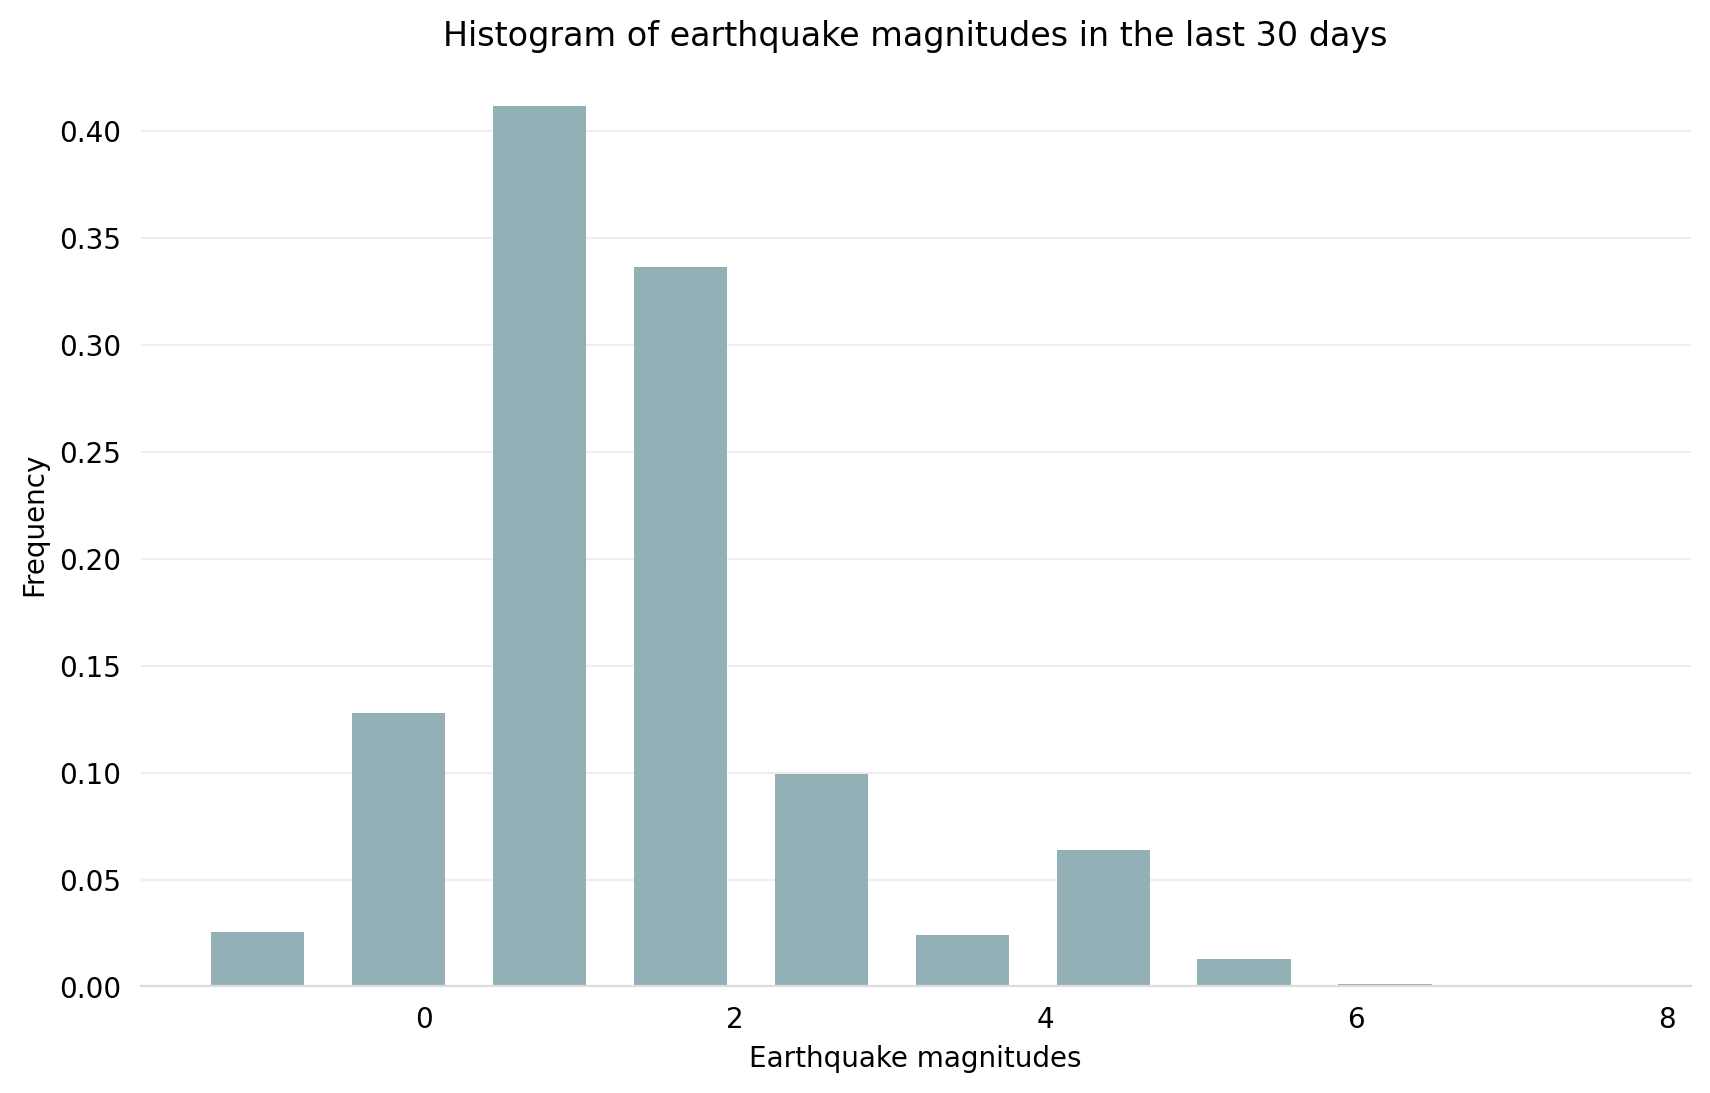

In [28]:
# Histogram of earthquake magnitudes 
# Earthquake magnitude distribution
histo = earthquake_data.mag.hist(density=True, alpha = 1.0, bins = 10, width = 0.6, color = "#94B0B7", figsize= (10,6))
#histo = where_4_mag.mag.hist(density=True, alpha = 0.5, bins = 10, width = 0.3, color = "#E0BFB8")
plt.xlabel("Earthquake magnitudes")
plt.title("Histogram of earthquake magnitudes in the last 30 days")
plt.ylabel("Frequency")
%config InlineBackend.figure_format='retina'
histo.spines['top'].set_visible(False)
histo.spines['right'].set_visible(False)
histo.spines['left'].set_visible(False)
histo.spines['bottom'].set_color('#DDDDDD')
histo.tick_params(bottom=False, left=False)
histo.set_axisbelow(True)
histo.yaxis.grid(True, color='#EEEEEE')
histo.xaxis.grid(False) 

In [19]:
# top 20 places with earthquakes of mag >=4 in last 30 days 
where_4_mag = earthquake_data.query("mag >= 4")
mag_data = where_4_mag["place"].value_counts()
mag_data




place
south of the Fiji Islands                  33
southeast of the Loyalty Islands           21
Kermadec Islands, New Zealand              19
Fiji region                                13
South Sandwich Islands region              12
                                           ..
16 km W of pamas, Iran                      1
17 km W of Talisay, Philippines             1
96 km WSW of Kandrian, Papua New Guinea     1
58 km S of Puerto San José, Guatemala       1
77 km N of Namuac, Philippines              1
Name: count, Length: 654, dtype: int64

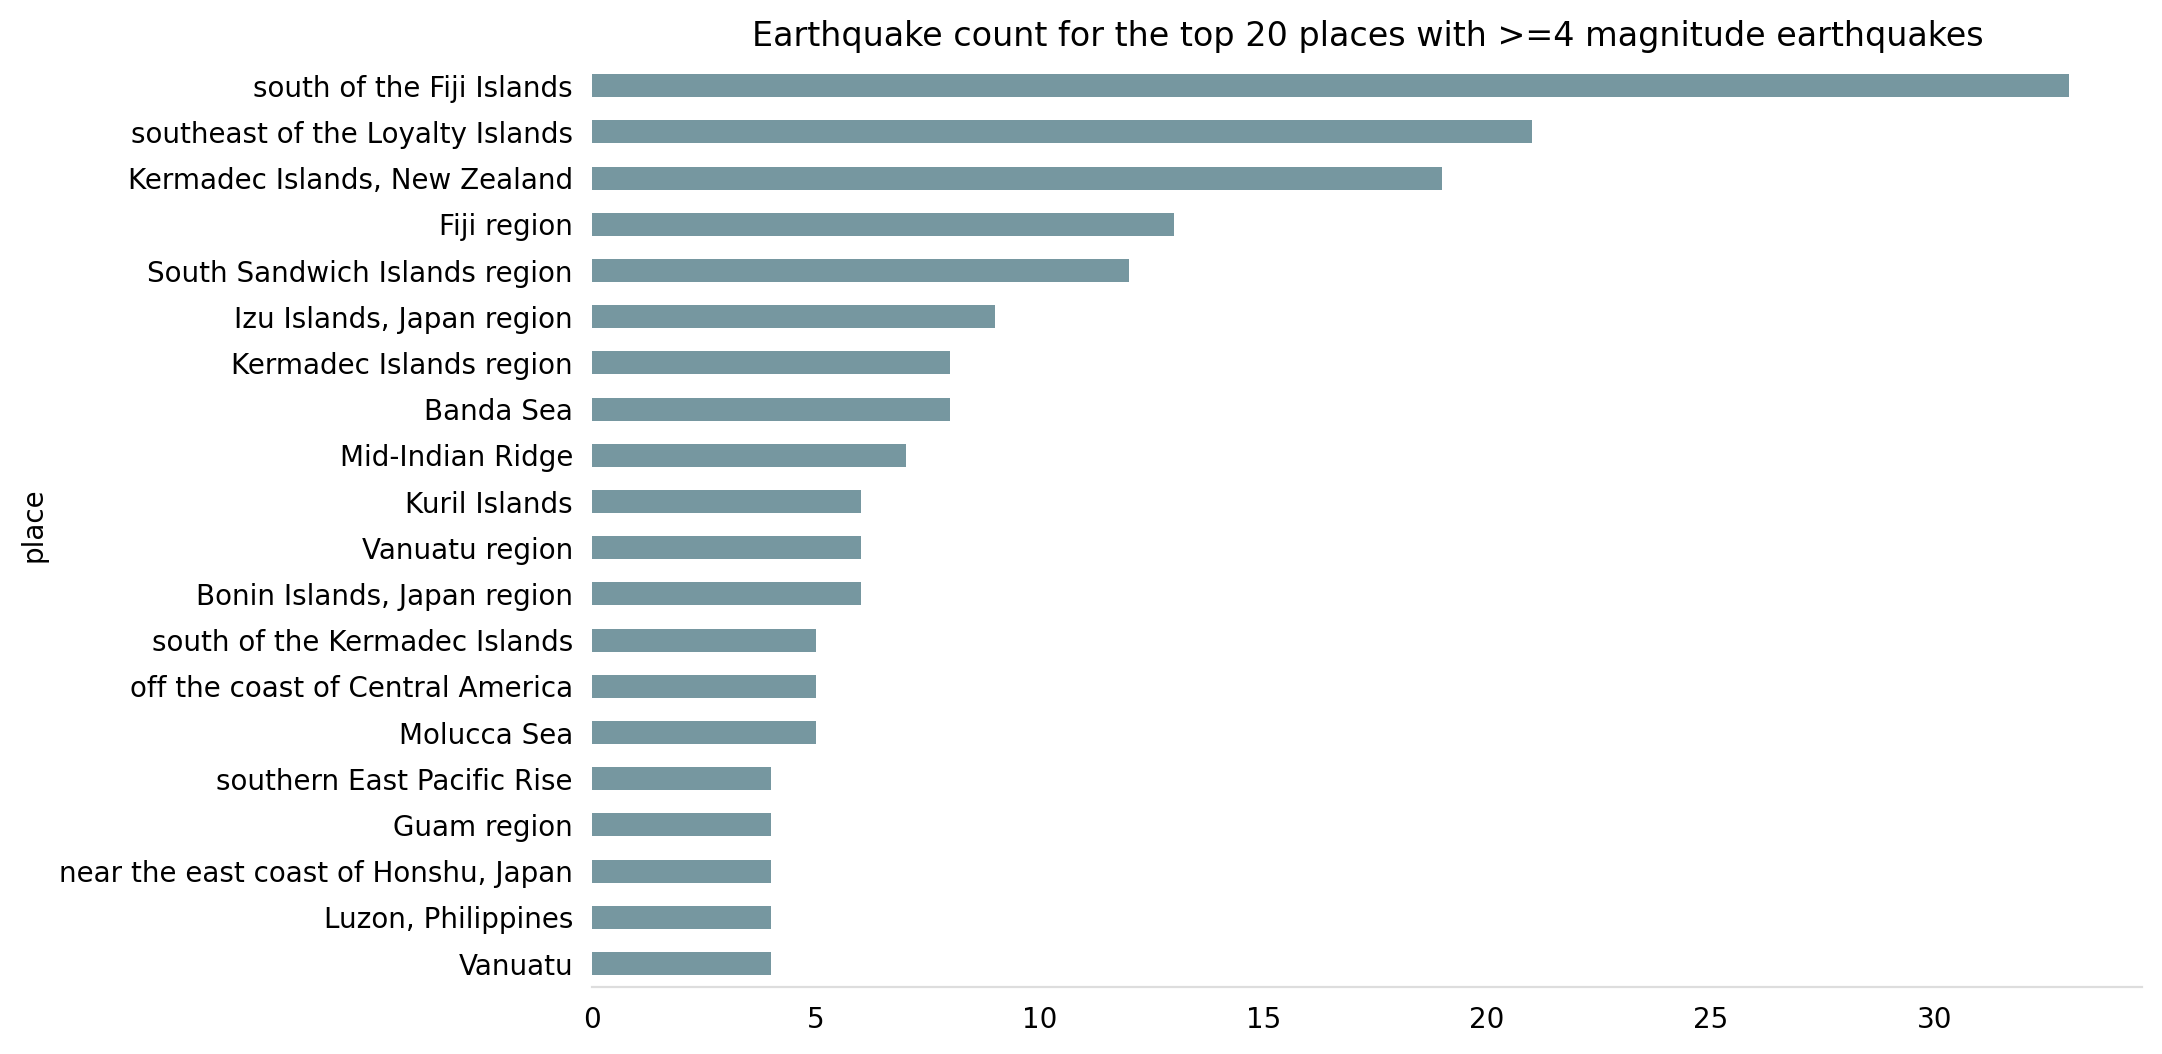

In [20]:
# visualising top 20 places with earthquakes of mag >=4 in last 30 days 
mag_data = where_4_mag["place"].value_counts()[:20].sort_values().plot(kind="barh", 
                                                                       title = "Earthquake count for the top 20 places with >=4 magnitude earthquakes", 
                                                                       color = "#7697A0",
                                                                       figsize = (10,6),
                                                                        fontsize= 10)

%config InlineBackend.figure_format='retina'

mag_data.spines['top'].set_visible(False)
mag_data.spines['right'].set_visible(False)
mag_data.spines['left'].set_visible(False)
mag_data.spines['bottom'].set_color('#DDDDDD')
mag_data.tick_params(bottom=False, left=False)


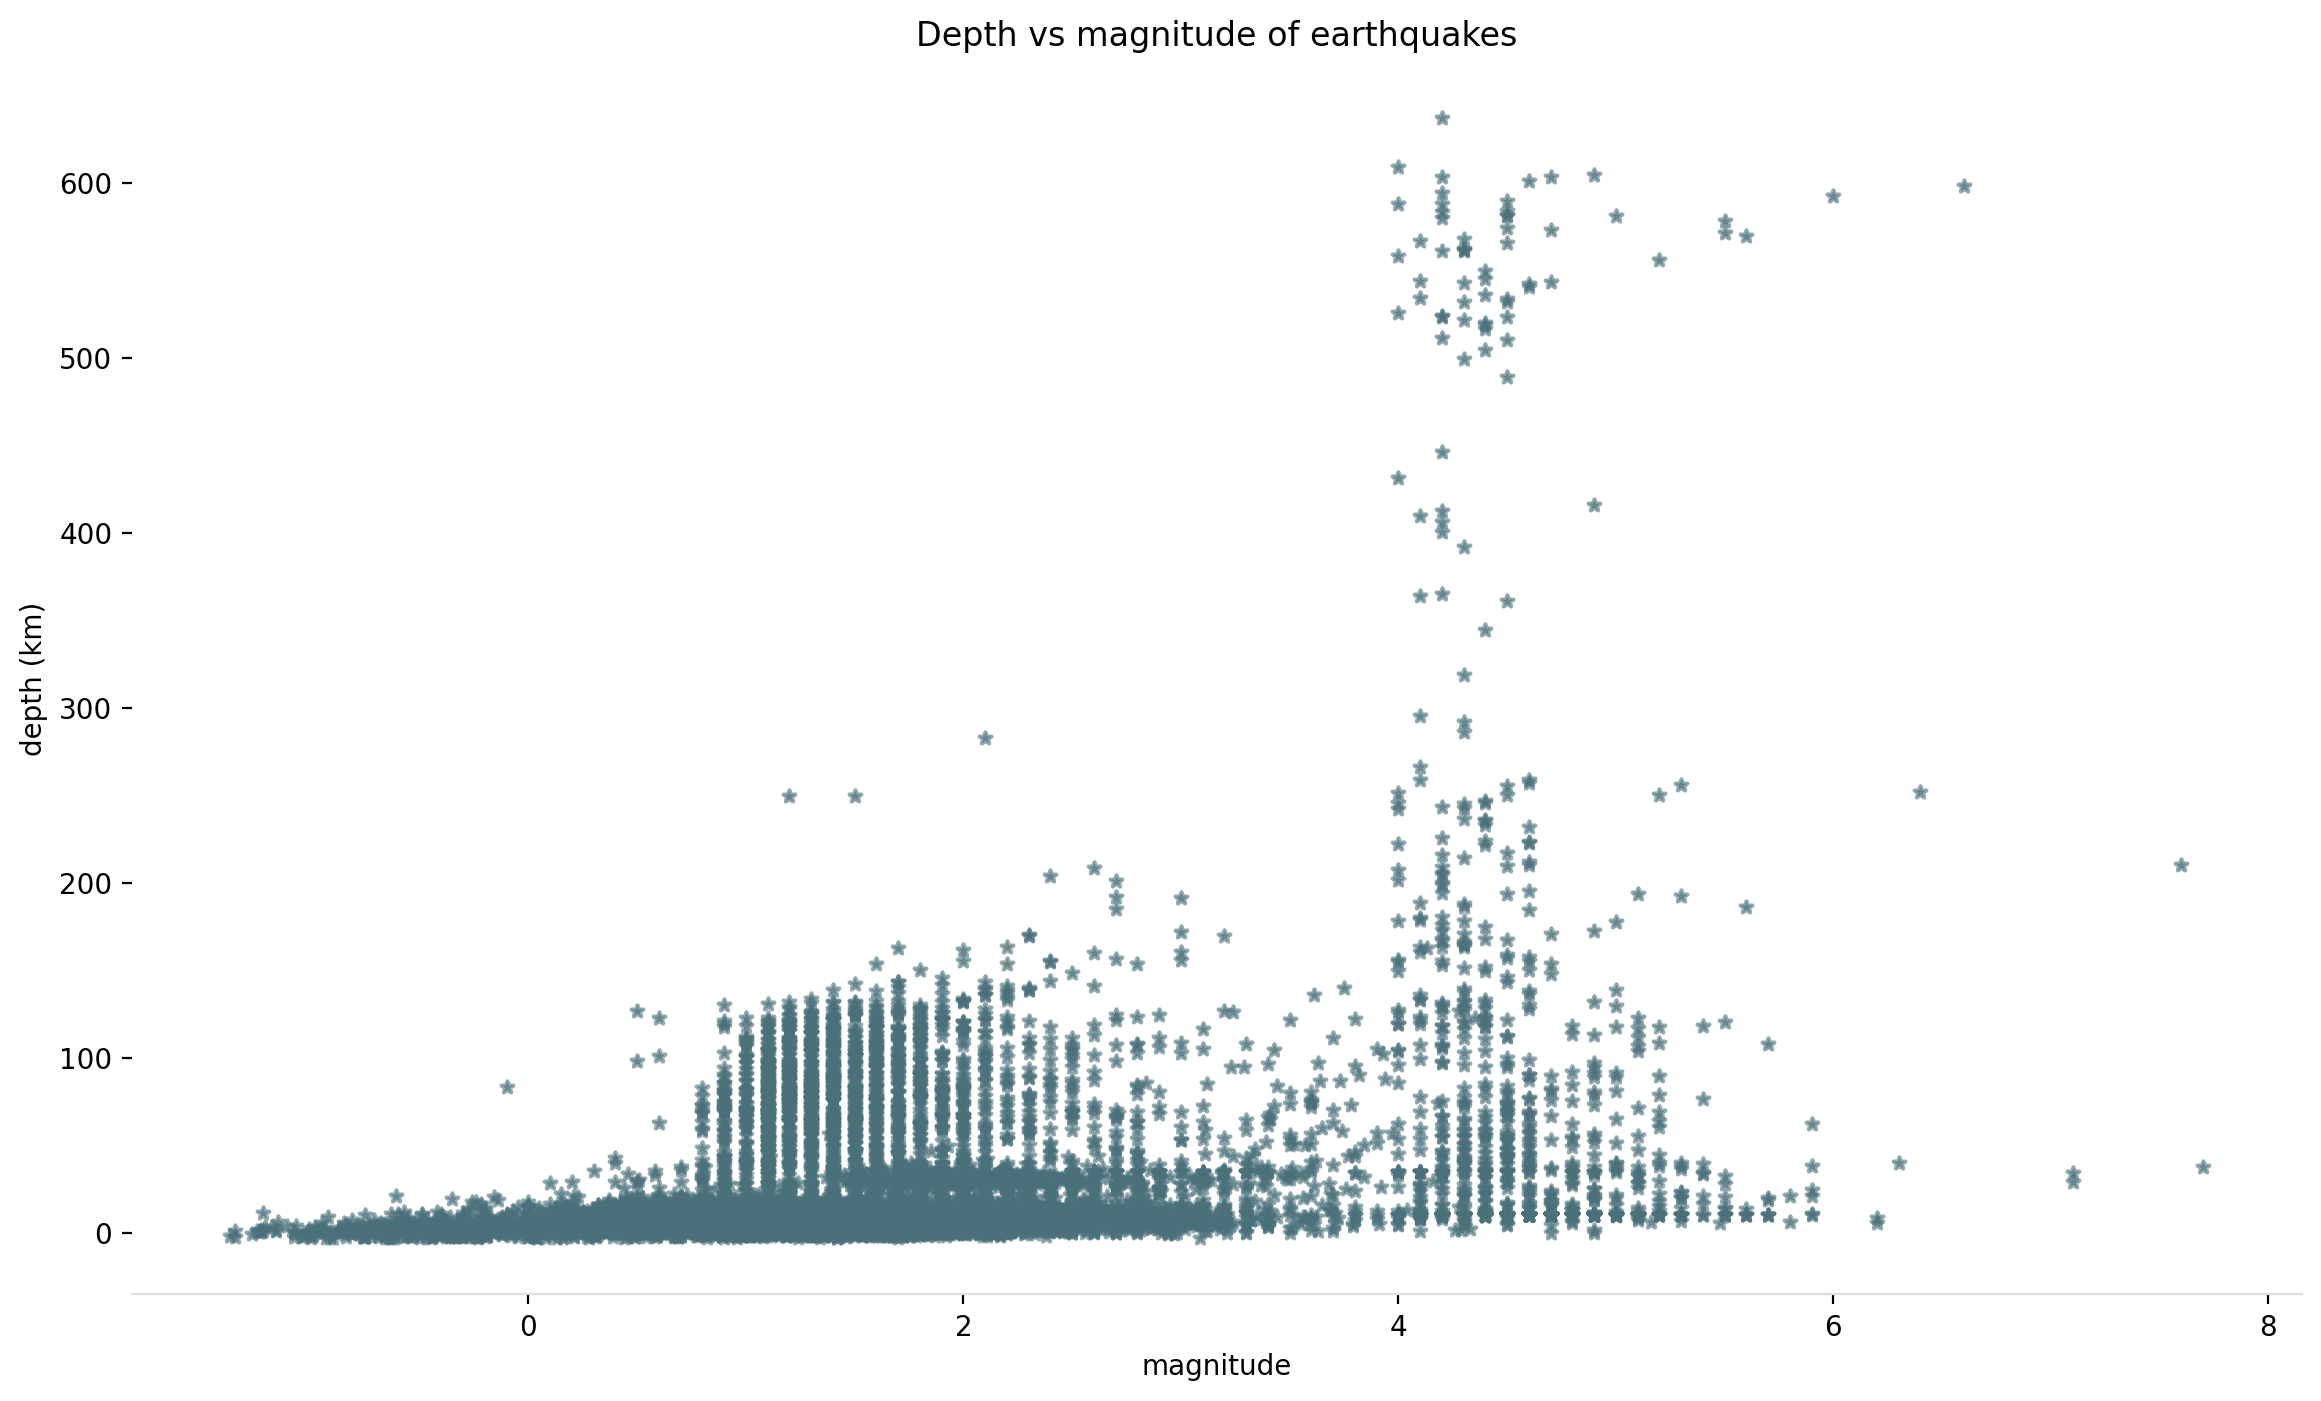

In [21]:
#depth vs magnitude plot 
scatt_earth = earthquake_data.plot(kind="scatter", 
                                   x="mag", 
                                   y="depth", 
                                   figsize=(14,8),
                                   alpha=0.6,
                                   color = "#4A707A",
                                   title = "Depth vs magnitude of earthquakes",
                                   marker = "*",
                                   linewidth = 1.5,
                                   xlabel = "magnitude",
                                   ylabel = "depth (km)")

%config InlineBackend.figure_format='retina'
scatt_earth.spines['top'].set_visible(False)
scatt_earth.spines['right'].set_visible(False)
scatt_earth.spines['left'].set_visible(False)
scatt_earth.spines['bottom'].set_color('#DDDDDD')
mag_data.tick_params(bottom=False, left=False)

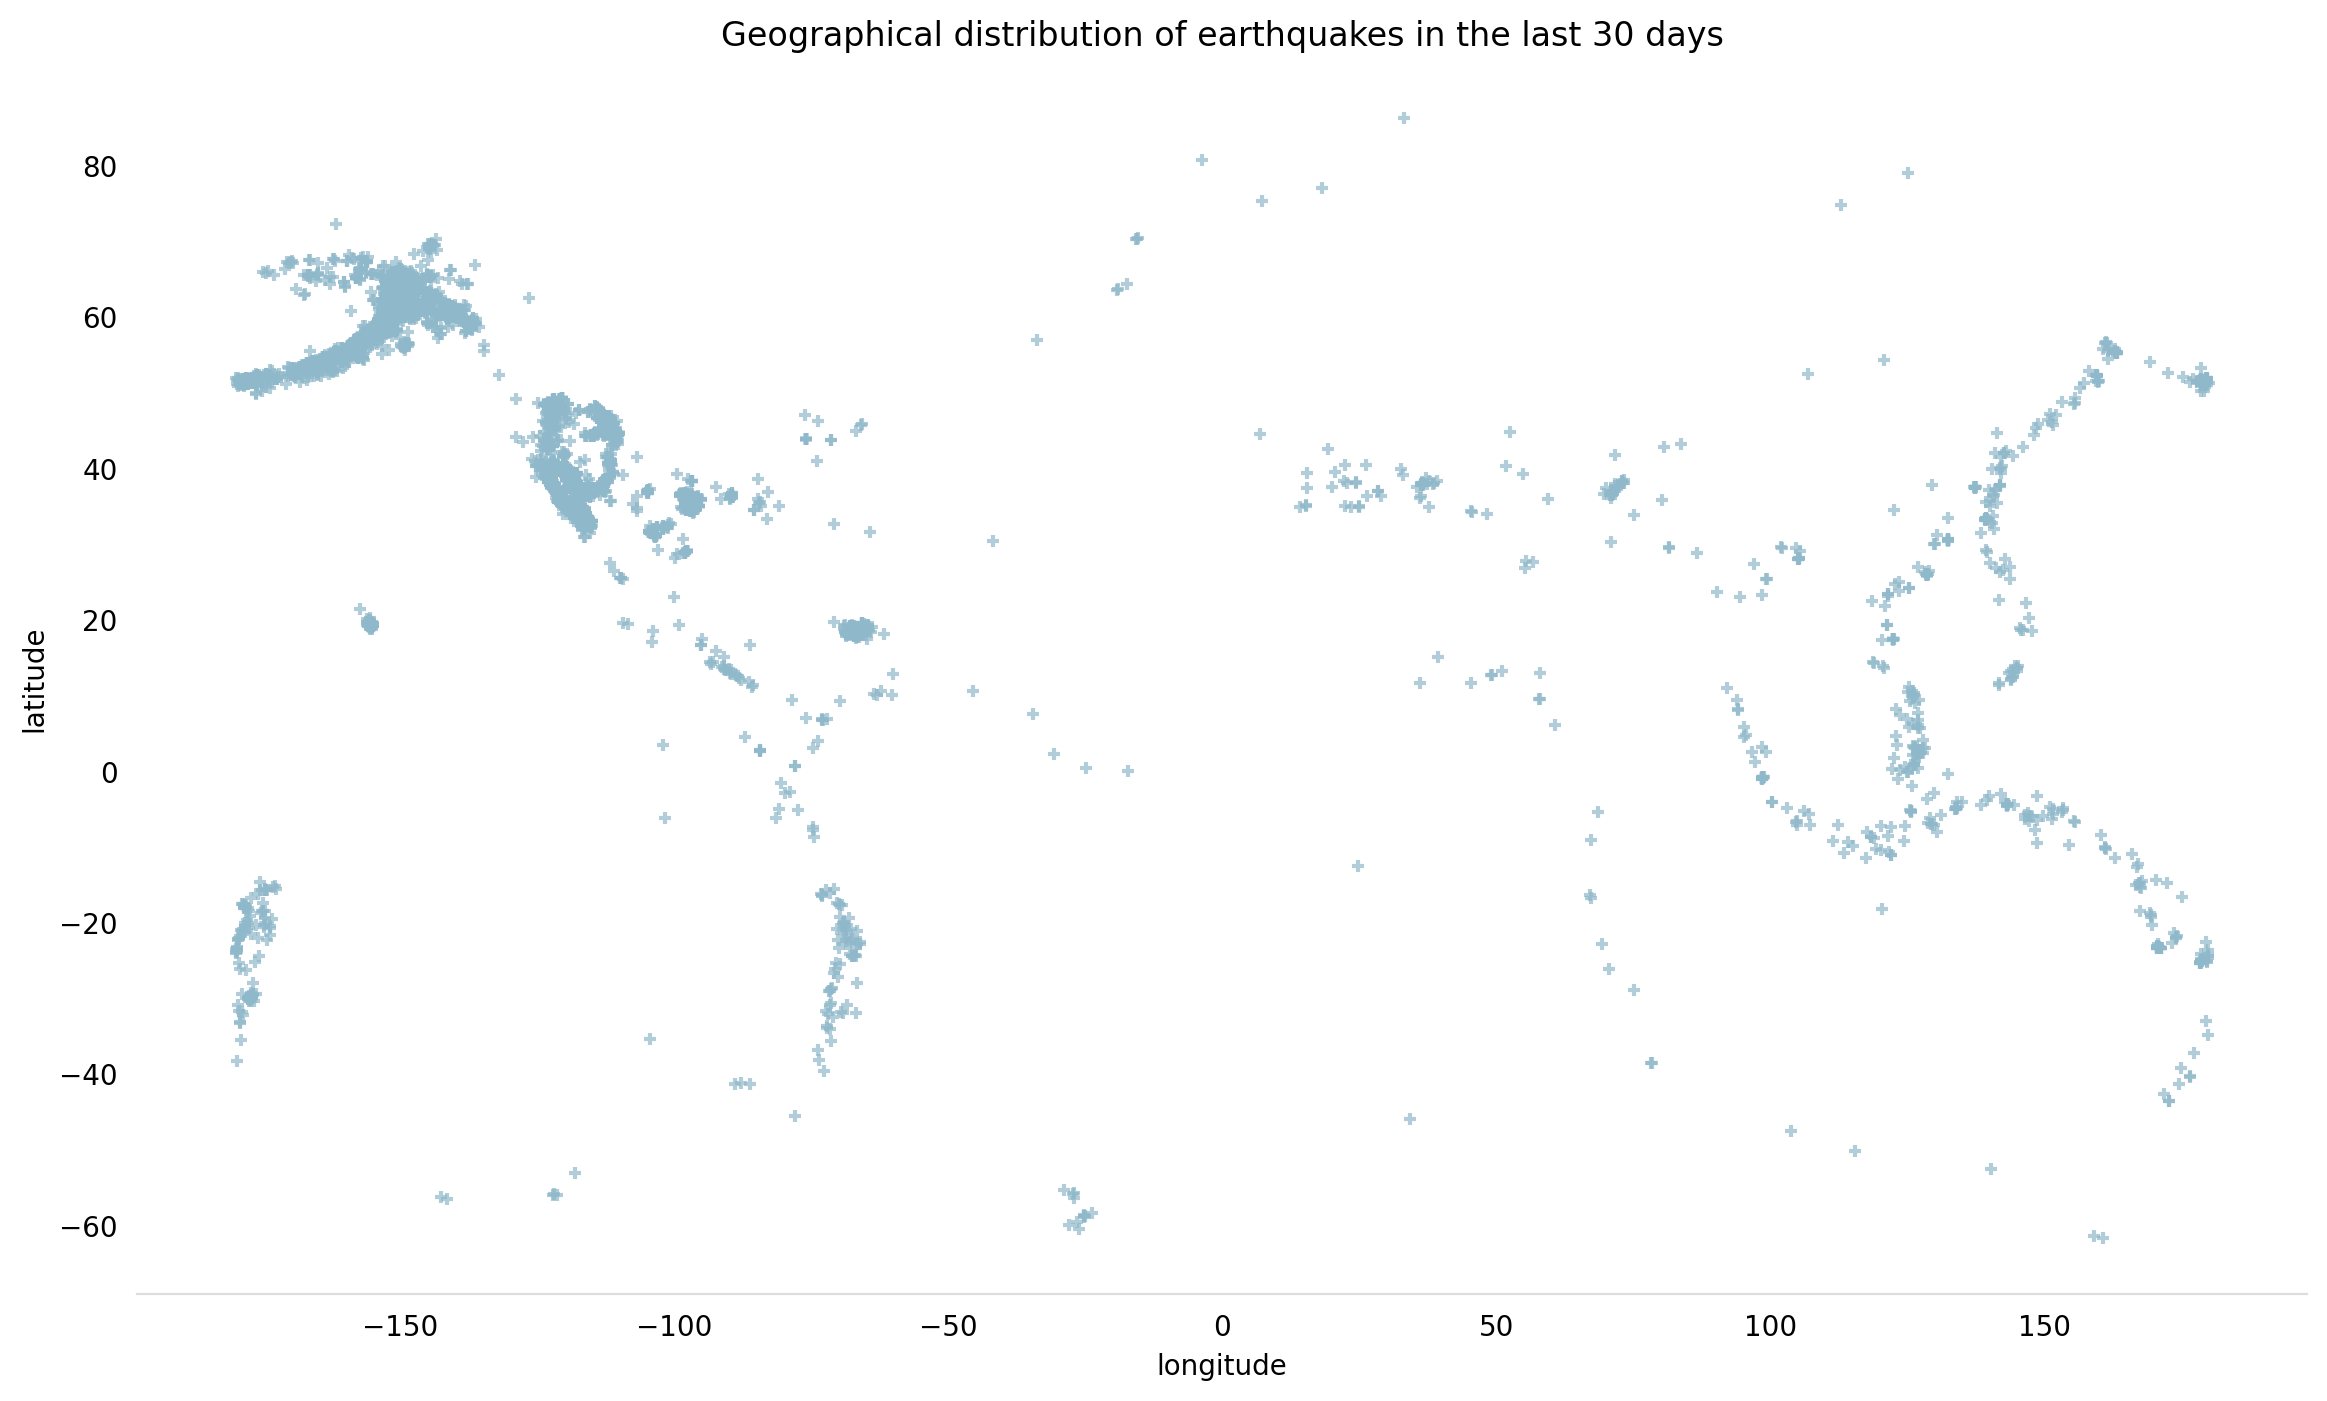

In [26]:
## geographic visualisation
import matplotlib.pyplot as plt
from matplotlib import image 

lat_long = earthquake_data.plot(kind = "scatter",
                                x = "longitude",
                                y= "latitude",
                                figsize=(14,8),
                                marker = "+",
                                title = "Geographical distribution of earthquakes in the last 30 days",
                                color = "#8FB8CA",
                                alpha = 0.7)

                        


%config InlineBackend.figure_format='retina'
lat_long.spines['top'].set_visible(False)
lat_long.spines['right'].set_visible(False)
lat_long.spines['left'].set_visible(False)
lat_long.spines['bottom'].set_color('#DDDDDD')
lat_long.tick_params(bottom=False, left=False)


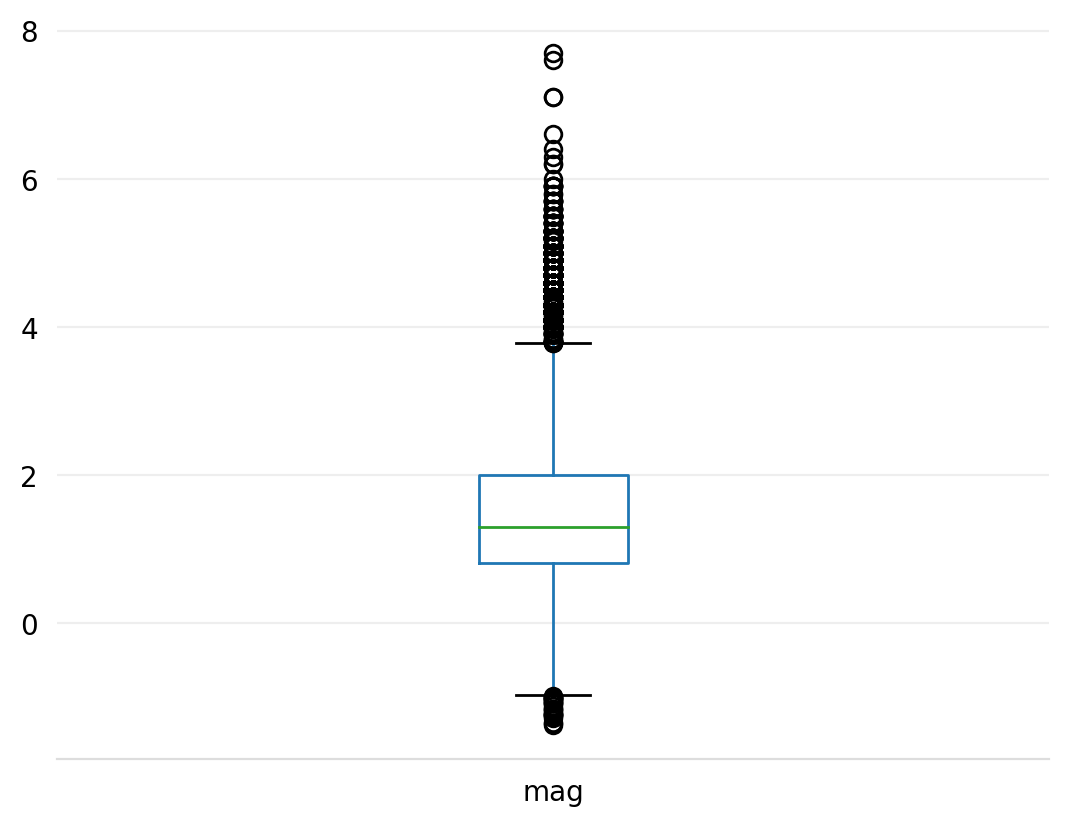

In [43]:
box = earthquake_data.boxplot(column= "mag", return_type="axes", whis = 1.5)
%config InlineBackend.figure_format='retina'
box.spines['top'].set_visible(False)
box.spines['right'].set_visible(False)
box.spines['left'].set_visible(False)
box.spines['bottom'].set_color('#DDDDDD')
box.tick_params(bottom=False, left=False)
box.set_axisbelow(True)
box.yaxis.grid(True, color='#EEEEEE')
box.xaxis.grid(False) 
